In [16]:
import keras
from keras import callbacks
from models.ffnn_keras import model_simple, model_deeper, model_wider, model_high_capacity
from utils.data_loader import prepare_mnist_data
import pandas as pd

Loading MNIST data...
Preprocessing data...
====== MNIST Dataset Statistics ======
Training samples: 48000
Validation samples: 12000
Test samples: 10000
Input shape: (784,)
Number of classes: 10
Data type: float32
Value range: [0.000, 1.000]

Class distribution in training set:
  Digit 0: 4717.0 samples (9.8%)
  Digit 1: 5391.0 samples (11.2%)
  Digit 2: 4782.0 samples (10.0%)
  Digit 3: 4903.0 samples (10.2%)
  Digit 4: 4658.0 samples (9.7%)
  Digit 5: 4373.0 samples (9.1%)
  Digit 6: 4710.0 samples (9.8%)
  Digit 7: 4986.0 samples (10.4%)
  Digit 8: 4724.0 samples (9.8%)
  Digit 9: 4756.0 samples (9.9%)


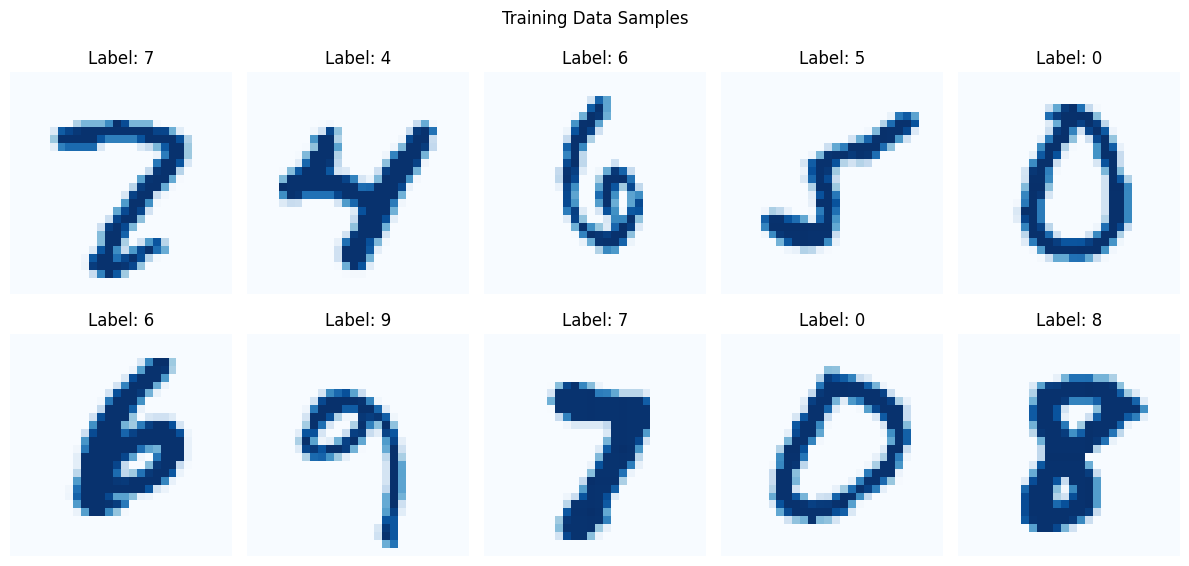

In [17]:
# Load and prepare all data
train_data, val_data, test_data = prepare_mnist_data(
    validation_split=0.2,    # 20% for validation, i.e., 12,000 validation pictures
    normalize=True,          # Scale to [0,1]
    flatten=True,            # Flatten for fully connected layers
    show_samples=True,       # Show sample images
    show_stats=True          # Print dataset statistics
)

# unpack the data for use
(x_train, y_train) = train_data
(x_val, y_val) = val_data
(x_test, y_test) = test_data

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9751 - loss: 0.0819 - val_accuracy: 0.9584 - val_loss: 0.1683
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9798 - loss: 0.0629 - val_accuracy: 0.9588 - val_loss: 0.1683
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9822 - loss: 0.0577 - val_accuracy: 0.9580 - val_loss: 0.1719
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9835 - loss: 0.0531 - val_accuracy: 0.9589 - val_loss: 0.1703
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9843 - loss: 0.0517 - val_accuracy: 0.9583 - val_loss: 0.1725
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9866 - loss: 0.0461 - val_accuracy: 0.9575 - val_loss: 0.1724
Minimum validation loss: 0.16825617849826813


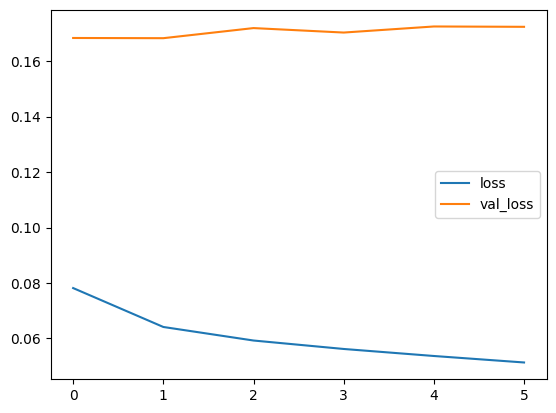

In [18]:
# hyper-parameters
mini_batch_size = 32
num_epochs = 50
learning_rate = 0.001

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model_simple.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_simple.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_1 = pd.DataFrame(history_1.history)
history_df_1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_1['val_loss'].min()))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9409 - loss: 0.2014 - val_accuracy: 0.9628 - val_loss: 0.1498
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9504 - loss: 0.1663 - val_accuracy: 0.9634 - val_loss: 0.1429
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9507 - loss: 0.1585 - val_accuracy: 0.9637 - val_loss: 0.1400
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9544 - loss: 0.1469 - val_accuracy: 0.9639 - val_loss: 0.1367
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9552 - loss: 0.1444 - val_accuracy: 0.9647 - val_loss: 0.1335
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9536 - loss: 0.1471 - val_accuracy: 0.9653 - val_loss: 0.1352
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9559 - loss: 0.1378 - val_accuracy: 0.9664 - val_loss: 0.1322
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9555 - loss: 0.1357 - 

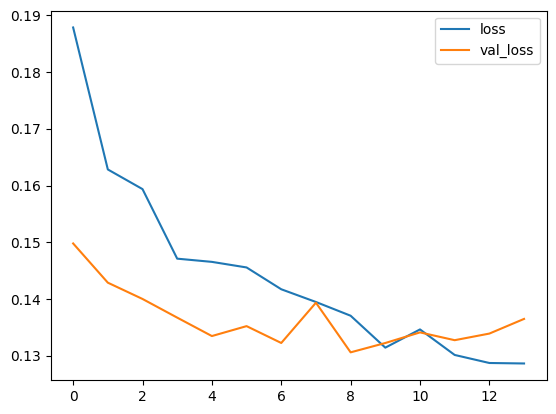

In [19]:
model_wider.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_wider.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_2 = pd.DataFrame(history_2.history)
history_df_2.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_2['val_loss'].min()))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6205 - loss: 1.1290 - val_accuracy: 0.9221 - val_loss: 0.2798
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.4533 - val_accuracy: 0.9351 - val_loss: 0.2290
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8839 - loss: 0.3850 - val_accuracy: 0.9417 - val_loss: 0.2023
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.3393 - val_accuracy: 0.9484 - val_loss: 0.1793
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9050 - loss: 0.3224 - val_accuracy: 0.9523 - val_loss: 0.1687
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9099 - loss: 0.3013 - val_accuracy: 0.9534 - val_loss: 0.1597
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9121 - loss: 0.2891 - val_accuracy: 0.9550 - val_loss: 0.1565
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9181 - loss: 0.2730 - 

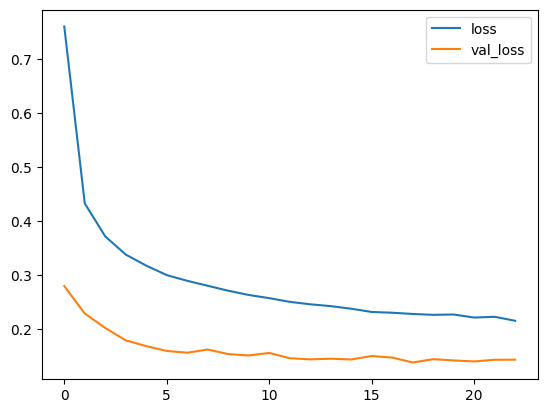

In [20]:
model_deeper.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_deeper.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_3 = pd.DataFrame(history_3.history)
history_df_3.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_3['val_loss'].min()))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9713 - loss: 0.1014 - val_accuracy: 0.9738 - val_loss: 0.0998
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9734 - loss: 0.0924 - val_accuracy: 0.9731 - val_loss: 0.0958
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9768 - loss: 0.0836 - val_accuracy: 0.9745 - val_loss: 0.0979
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9772 - loss: 0.0787 - val_accuracy: 0.9740 - val_loss: 0.0988
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9784 - loss: 0.0742 - val_accuracy: 0.9714 - val_loss: 0.1087
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9783 - loss: 0.0747 - val_accuracy: 0.9747 - val_loss: 0.0988
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9798 - loss: 0.0701 - val_accuracy: 0.9766 - val_loss: 0.0922
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9806 - loss: 0.0634 - 

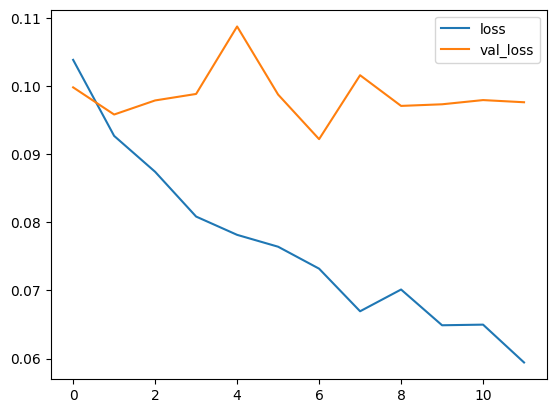

In [22]:
model_high_capacity.compile(
    optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_4 = model_high_capacity.fit(

    x_train, y_train,
    validation_data=val_data,
    batch_size=mini_batch_size,
    epochs=num_epochs,
    callbacks=[early_stopping],
    verbose=1
)

history_df_4 = pd.DataFrame(history_4.history)
history_df_4.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df_4['val_loss'].min()))